In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("../illegal_dumping_daily.csv")

In [23]:
df

,day,cnt
0,2016-01-10,1
1,2016-01-11,43
2,2016-01-12,40
3,2016-01-13,40
4,2016-01-14,32
...,...,...
3524,2025-09-14,17
3525,2025-09-15,118
3526,2025-09-16,101
3527,2025-09-17,99


In [24]:
df['day'] = pd.to_datetime(df['day'])
df = df.sort_values('day')

In [25]:
print(df.head())
print(df.tail())
print(df.isna().sum())

         day  cnt
0 2016-01-10    1
1 2016-01-11   43
2 2016-01-12   40
3 2016-01-13   40
4 2016-01-14   32
            day  cnt
3524 2025-09-14   17
3525 2025-09-15  118
3526 2025-09-16  101
3527 2025-09-17   99
3528 2025-09-18   49
day    0
cnt    0
dtype: int64


In [26]:
# set daily index (fill missing days with 0)
ts = (df.set_index('day')['cnt']
        .asfreq('D', fill_value=0))

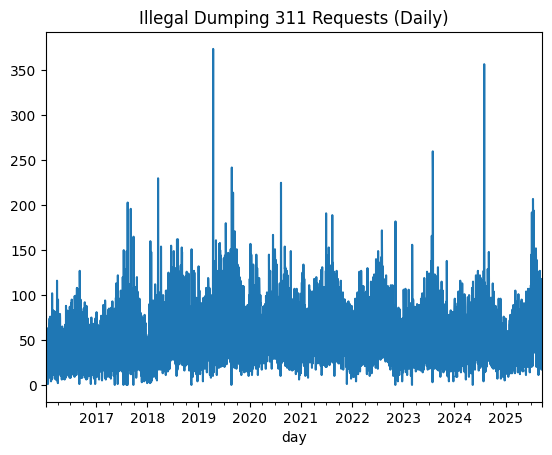

In [27]:
# quick plots
ts.plot(title='Illegal Dumping 311 Requests (Daily)')
plt.show()

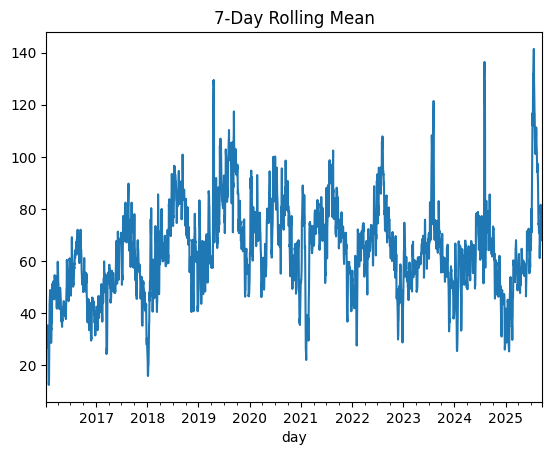

In [28]:
ts.rolling(7).mean().plot(title='7-Day Rolling Mean')
plt.show()

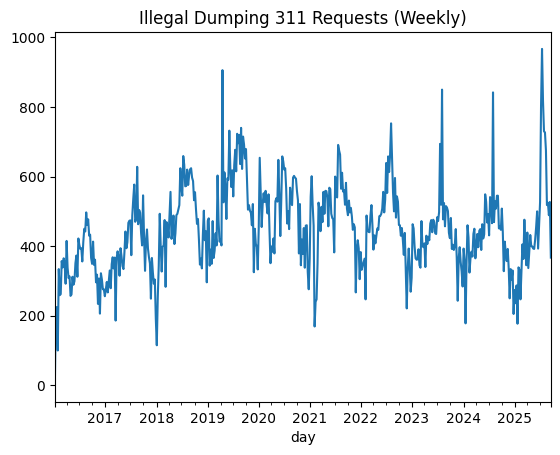

In [29]:
# aggregate to weekly (often smoother for forecasting)
ts_w = ts.resample('W').sum()
ts_w.plot(title='Illegal Dumping 311 Requests (Weekly)')
plt.show()

Filtered data contains 2449 rows from 2019-01-01 to 2025-09-18


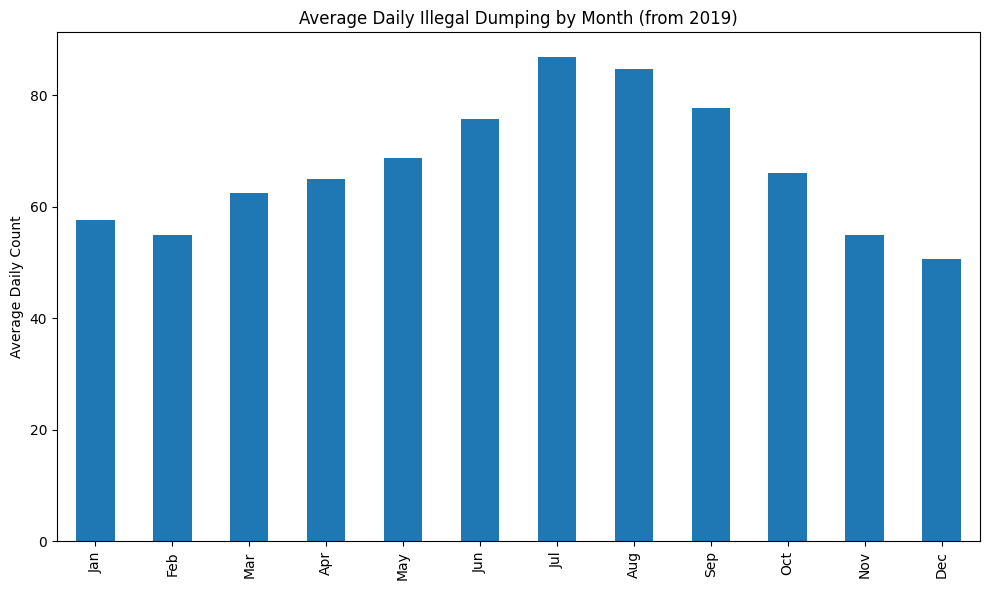

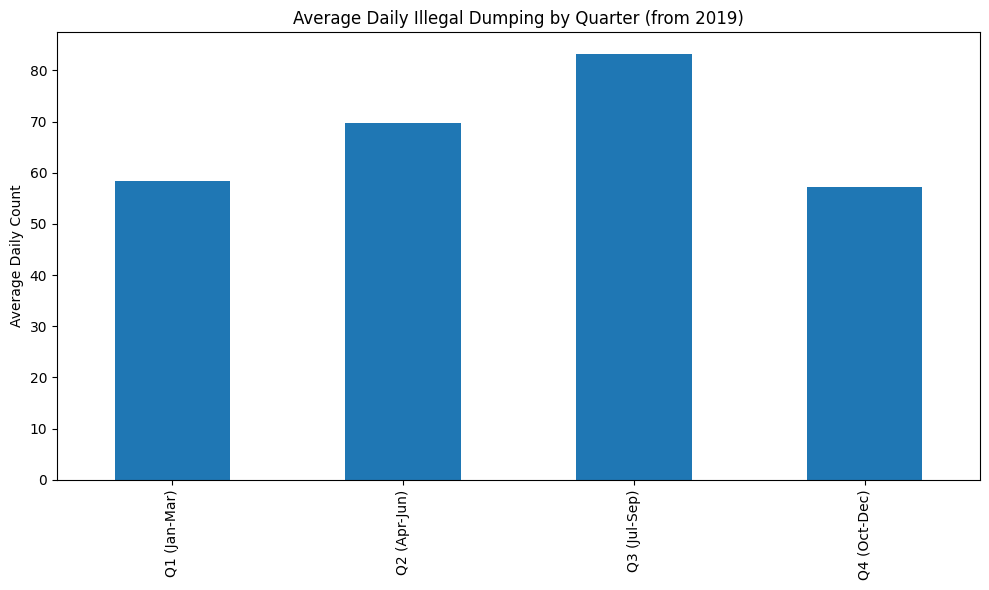

In [30]:
# Filter data from January 2019 onwards
df_filtered = df[df['day'] >= '2019-01-01']

# Display the filtered dataframe
print(f"Filtered data contains {len(df_filtered)} rows from {df_filtered['day'].min().date()} to {df_filtered['day'].max().date()}")

ts_filtered = (df_filtered.set_index('day')['cnt']
               .asfreq('D', fill_value=0))

# Create a month-based seasonal view
# Group by month and calculate average count per month
monthly_avg = ts_filtered.groupby(ts_filtered.index.month).mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Month (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()

# Create a seasonal view by quarter
quarterly_avg = ts_filtered.groupby(ts_filtered.index.quarter).mean()
quarterly_avg.index = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
quarterly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Quarter (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()

2024 Data Points: 366
Date Range: 2024-01-01 to 2024-12-31
Average Daily Count: 60.58
Max Daily Count: 357 on 2024-08-01
Min Daily Count: 0 on 2024-05-11


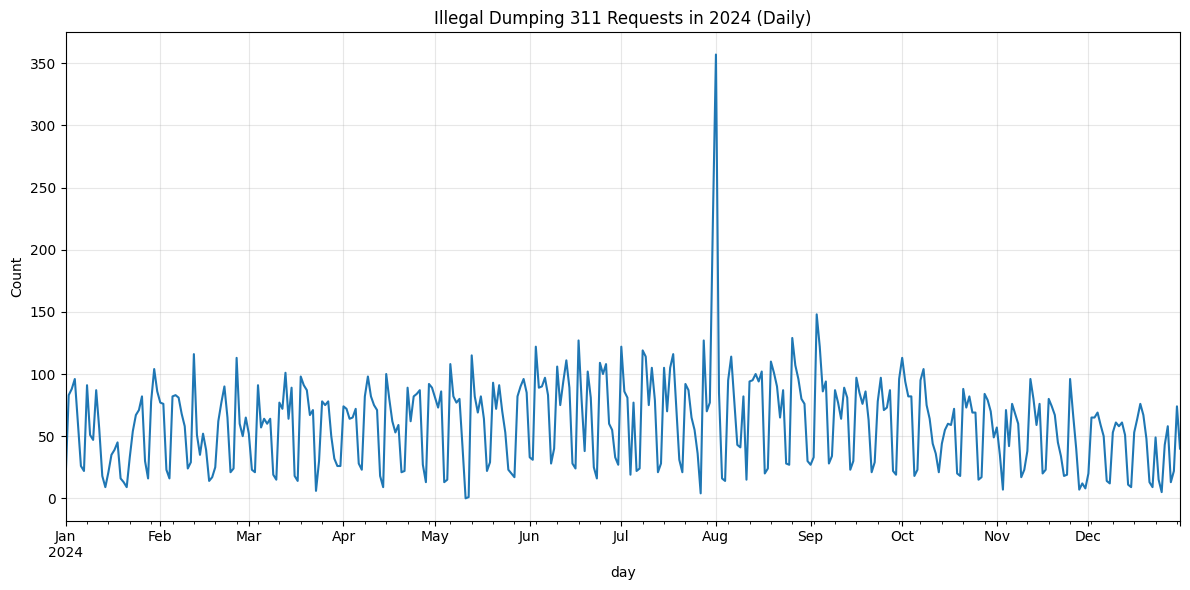

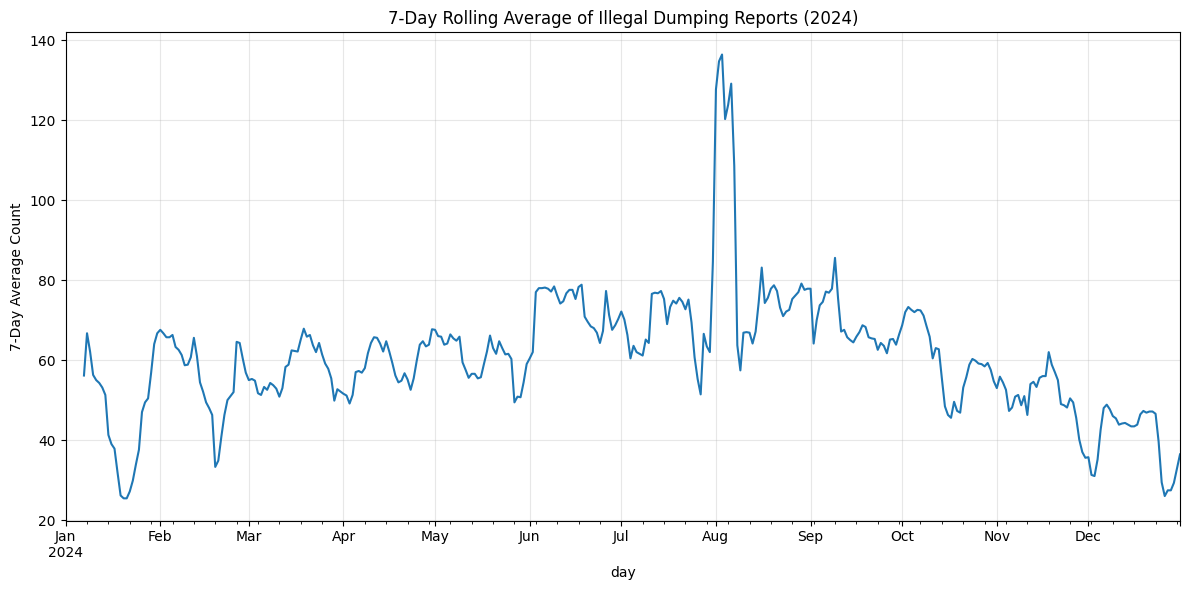

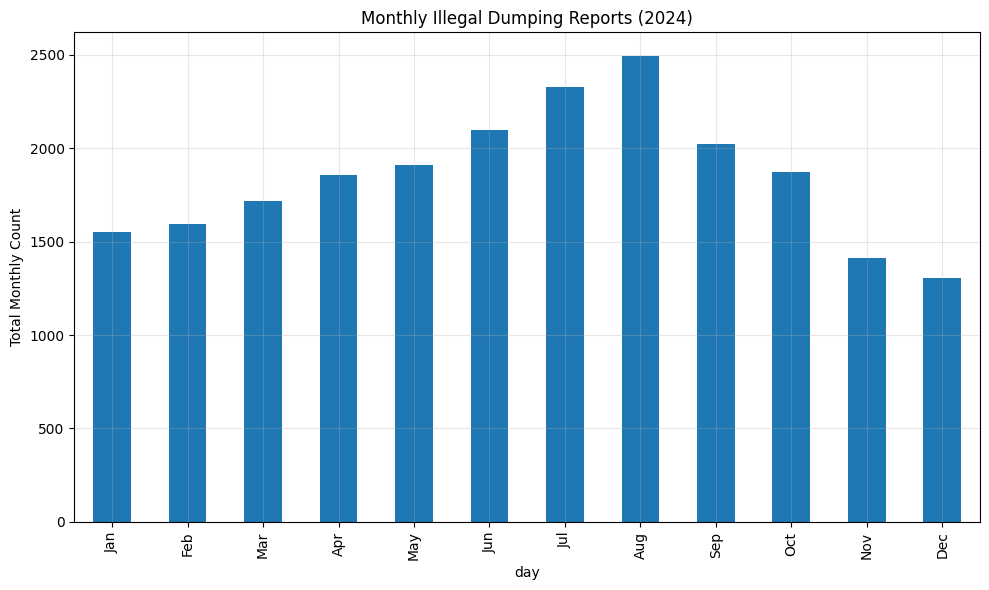

In [36]:
# Filter data for user-selected year
# No need to import exception, we can raise ValueError directly

user_selected_year = input("Enter year to analyze (e.g., 2024): ")
user_selected_year = int(user_selected_year) if user_selected_year.isdigit() else ValueError("Invalid year input.")
# If we get here, the conversion was successful
ts_year = ts[ts.index.year == user_selected_year]
# Display basic statistics
print(f"{user_selected_year} Data Points: {len(ts_year)}")
if not ts_year.empty:
	print(f"Date Range: {ts_year.index.min().date()} to {ts_year.index.max().date()}")
	print(f"Average Daily Count: {ts_year.mean():.2f}")
	print(f"Max Daily Count: {ts_year.max()} on {ts_year.idxmax().date()}")
	print(f"Min Daily Count: {ts_year.min()} on {ts_year.idxmin().date()}")
if not ts_year.empty:
	# Plot daily data for selected year
	plt.figure(figsize=(12, 6))
	ts_year.plot(title=f'Illegal Dumping 311 Requests in {user_selected_year} (Daily)')
	plt.ylabel('Count')
	plt.grid(True, alpha=0.3)
	plt.tight_layout()
	plt.show()

	# Plot 7-day rolling average for selected year
	plt.figure(figsize=(12, 6))
	ts_year.rolling(7).mean().plot(title=f'7-Day Rolling Average of Illegal Dumping Reports ({user_selected_year})')
	plt.ylabel('7-Day Average Count')
	plt.grid(True, alpha=0.3)
	plt.tight_layout()
	plt.show()

	# Monthly aggregation for selected year
	monthly_year = ts_year.resample('ME').sum()
	monthly_year.index = monthly_year.index.strftime('%b')
plt.figure(figsize=(10, 6))
monthly_year.plot(kind='bar', title=f'Monthly Illegal Dumping Reports ({user_selected_year})')
plt.ylabel('Total Monthly Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()